In [1]:
"""
Last Updated: 01/11/2021
------------------------

The purpose of this notebook is to get a idea of how the translation of the smiles to 
the coarse-grained beads of Martini can work. 

-> https://cedric.bouysset.net/blog/2020/08/07/rdkit-interoperability

-> https://stackoverflow.com/questions/47319238/python-plot-3d-vectors


"""

'\nLast Updated: 01/11/2021\n------------------------\n\nThe purpose of this notebook is to get a idea of how the translation of the smiles to \nthe coarse-grained beads of Martini can work. \n\n-> https://cedric.bouysset.net/blog/2020/08/07/rdkit-interoperability\n\n-> https://stackoverflow.com/questions/47319238/python-plot-3d-vectors\n\n\n'

In [2]:
!pip install plotly

/home/synoh/.local/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/synoh/.local/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import MDAnalysis as mda
from rdkit import Chem
import plotly.graph_objs as go


# Alignment libraries

from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd

In [4]:
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [3]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [3]:
"""
Converting an RDkit to MDAnalysis

Parse an Rdkit molecule and build an MDAnalysis Universe from it .

"""

'\nConverting an RDkit to MDAnalysis\n\nParse an Rdkit molecule and build an MDAnalysis Universe from it .\n\n'

In [18]:
!pip install vtk

     |████████████████████████████████| 59.5 MB 36 kB/s  eta 0:00:01     |████████████████▏               | 30.0 MB 4.3 MB/s eta 0:00:07     |██████████████████████          | 40.7 MB 4.0 MB/s eta 0:00:05     |████████████████████████▋       | 45.7 MB 1.8 MB/s eta 0:00:08
     |████████████████████████████████| 495 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 51 kB/s  eta 0:00:01
     |████████████████████████████████| 74 kB 69 kB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 57 kB/s  eta 0:00:01     |███████████████████████▏        | 962 kB 953 kB/s eta 0:00:01
  Using cached async_timeout-3.0.1-py3-none-any.whl (8.2 kB)
     |████████████████████████████████| 271 kB 644 kB/s eta 0:00:01
     |████████████████████████████████| 160 kB 1.1 MB/s eta 0:00:01
  Attempting uninstall: hyperlink
    Found existing installation: hyperlink 20.0.1
    Uninstalling hyperlink-20.0.1:
      Successfully uninstalled hyperlink-20.0.1
  Attempting uninstall: c

In [6]:
u1.select_atoms("aromatic")  # Aromatic

<AtomGroup with 18 atoms>

In [7]:
u1.select_atoms("not aromatic") # Non-aromatic 

<AtomGroup with 29 atoms>

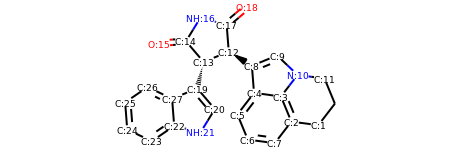

In [8]:
mol_with_atom_index(mol)

In [12]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")

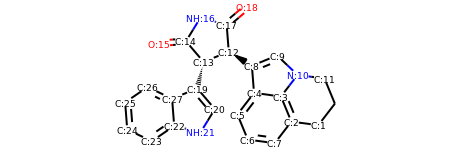

In [9]:
mol

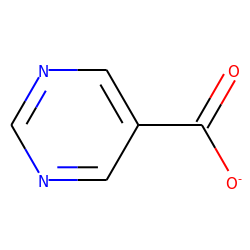

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 250,250

m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
AllChem.ComputeGasteigerCharges(m)
m

In [4]:
""" 
Annotating and drawing an example sulfur ligand 
"""
AromaticSulfurSmilesString = 'C1=C(C=CC=C1)CS[H]'
m_aromatic = Chem.MolFromSmiles(AromaticSulfurSmilesString)
mol_with_atom_index(m_aromatic)
m_aromatic

u1 = mda.Universe.from_smiles("C1=C(C=CC=C1)CS[H]")
Molecule = u1.select_atoms('all')
Molecule.positions # Finds 

NameError: name 'mol_with_atom_index' is not defined

In [5]:
# Highlight a Substructure in a Molecule - Can we identify the benzene part and sulfur part?


ConvertedSmiles = Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1'))
ConvertedSmiles

ExampleMartiniString = "CC(=O)CO" # Example smiles string that is compatible with MARTINI 
ConvertedSmiles2 = Chem.MolToSmiles(Chem.MolFromSmiles(ExampleMartiniString))
ConvertedSmiles2
m2  = Chem.MolFromSmiles(ConvertedSmiles2)
#m2
# Hence, we need to create a dictionary that catalogues the string with the relevant martini bead 
SmilesToMartiniDictionary = {}
SmilesToMartiniDictionary["CC(=O)CO"] = 'P2' # P2 Bead 
SmilesToMartiniDictionary["CC(=O)O"] = 'SP2' # SP2 Bead 
SmilesToMartiniDictionary["CC(C)O"] = 'P1' # P1 Bead 
SmilesToMartiniDictionary["CC(C)O"] = 'P1' # P1 Bead 

In [6]:
"""
This part links the lignad coordinates with the 
"""
# new feature
u1 = mda.Universe.from_smiles("c1ncncc1C(=O)[O-]")
# new feature
Molecule = u1.select_atoms('all')
Molecule.positions # Finds 

# Need to label each of the xyz coordinates with the relevant indices within the 

array([[-0.22506006,  1.2123555 , -0.36840782],
       [-1.5448865 ,  1.1146016 , -0.074056  ],
       [-2.127331  , -0.09176978,  0.13590463],
       [-1.4307195 , -1.1513876 , -0.34176236],
       [-0.08843774, -1.1126932 , -0.52497506],
       [ 0.59202075,  0.0869672 , -0.34529787],
       [ 1.9129803 ,  0.11817609,  0.29619113],
       [ 2.9853237 , -0.03508213, -0.3323795 ],
       [ 1.9794596 , -0.12247859,  1.672302  ],
       [ 0.27999353,  2.1736553 , -0.43828696],
       [-2.8406153 , -0.18642797,  0.95798695],
       [ 0.50727224, -2.0059164 , -0.6372192 ]], dtype=float32)

In [13]:
SmilesToMartiniDictionary

{'CC(=O)CO': 'P2', 'CC(=O)O': 'SP2', 'CC(C)O': 'P1'}

In [7]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('CC(=O)O')
print(m.GetSubstructMatches(substructure)) # Shows the indices of the molcule that matches the MARTINI bead 


((10, 8, 9, 7),)


In [16]:
"""
In the above situation, we can identify the 3 parts - the thiolated part, the saturated hydrocarbon chain attached 
to the benzene group, and the benzene group itself. 
"""
substructure = Chem.MolFromSmarts('SC')
print(m.GetSubstructMatches(substructure))

()


In [17]:
ri = m.GetRingInfo().AtomRings()
for ring in ri:
    print(ring)
    

(0, 12, 11, 6, 2, 1)


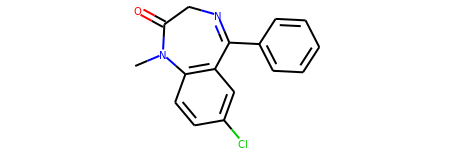

In [19]:
"""
Using 
"""

def GetRingSystems(mol, includeSpiro=False):
    """
    What is this function doing?
    """
    ri = mol.GetRingInfo() # Sets out the indices of the rings structures within the mol file 
    systems = []
    for ring in ri.AtomRings():
        ringAts = set(ring)
        nSystems = []
        for system in systems:
            nInCommon = len(ringAts.intersection(system))
            if nInCommon and (includeSpiro or nInCommon>1):
                ringAts = ringAts.union(system)
            else:
                nSystems.append(system)
        nSystems.append(ringAts)
        systems = nSystems
    return systems
mol = Chem.MolFromSmiles('CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3')
#print(GetRingSystems(mol))
mol

In [48]:
u = mda.Universe.from_smiles("Nc1cc(C[C@H]([O-])C=O)c[nH]1")
#mol = u.atoms.convert_to.rdkit()
#mol.RemoveAllConformers()
#for atom in mol.GetAtoms():
#    atom.SetProp("atomNote", str(atom.GetIdx()))
#mol
#u.positions
bb = u.select_atoms('all')
bb.positions

array([[ 3.5130105 ,  0.7228921 , -0.01457109],
       [ 2.2683268 ,  0.04198595,  0.04925309],
       [ 1.1309711 ,  0.5999384 ,  0.58533865],
       [ 0.13282233, -0.3556542 ,  0.47064218],
       [-1.2531828 , -0.17572765,  0.9214215 ],
       [-2.1354759 ,  0.40741408, -0.17204718],
       [-1.6202137 ,  1.6323073 , -0.53109324],
       [-3.511532  ,  0.4761106 ,  0.35876507],
       [-4.056504  , -0.5455693 ,  0.70330936],
       [ 0.71693003, -1.4357921 , -0.1259836 ],
       [ 2.0058072 , -1.1893704 , -0.37770912],
       [ 3.6123965 ,  1.6519574 , -0.46308097],
       [ 4.376456  ,  0.2928323 ,  0.39858386],
       [ 0.9885071 ,  1.5761458 ,  1.0194818 ],
       [-1.6746614 , -1.1560724 ,  1.2599269 ],
       [-1.2926594 ,  0.48665658,  1.8097904 ],
       [-2.0971105 , -0.2523841 , -1.0617344 ],
       [-4.03427   ,  1.4057119 ,  0.44470373],
       [ 0.22349006, -2.3689992 , -0.36925268],
       [ 2.706892  , -1.8143828 , -0.82198566]], dtype=float32)

In [8]:
#X, Y, Z
SphereList = [] 
for i in range(0, len(X)):
    SphereList.append([X[i], Y[i], Z[i]])
    
    
for i in range(0, len(SphereList) -1):
    SphereList[i][0] = SphereList[i][0] * 3
    SphereList[i][1] = SphereList[i][1] * 3
    SphereList[i][2] = SphereList[i][2] * 3

NameError: name 'X' is not defined

In [29]:
SphereList = SphereList * 3

In [4]:
for i in range(0, len(SphereList) -1):
    SphereList[i][0] = SphereList[i][0] * 3
    SphereList[i][1] = SphereList[i][1] * 3
    SphereList[i][2] = SphereList[i][2] * 3

NameError: name 'SphereList' is not defined

In [ ]:
SphereList

In [58]:
vector_plot(SphereList)

In [36]:
import numpy as np



In [37]:
vec1 = [2, 3, 2.5]
vec2 = [-3, 1, -3.4]

mat = rotation_matrix_from_vectors(vec1, vec2)
vec1_rot = mat.dot(vec1)
assert np.allclose(vec1_rot/np.linalg.norm(vec1_rot), vec2/np.linalg.norm(vec2))

In [38]:
mat

array([[ 0.3278514 , -0.49076494, -0.80725661],
       [ 0.58913355, -0.56178145,  0.58079537],
       [-0.73853579, -0.66599653,  0.10494526]])

In [39]:
vec1_rot = mat.dot(vec1)


In [40]:
vec1_rot

array([-2.83473355,  0.94491118, -3.21269802])

In [41]:
Molecule.positions
Molecule.atoms.write("mol.pdb")

/home/sang/anaconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:747: UserWarning:

Unit cell dimensions not found. CRYST1 record set to unitary values.

/home/sang/anaconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning:

Found no information for attr: 'altLocs' Using default value of ' '

/home/sang/anaconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning:

Found no information for attr: 'resnames' Using default value of 'UNK'

/home/sang/anaconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning:

Found no information for attr: 'icodes' Using default value of ' '

/home/sang/anaconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning:

Found no information for attr: 'chainIDs' Using default value of ''

/home/sang/anaconda3/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning:

Found no information for attr: 'occupancies' Using default 

In [109]:
Molecule.positions[5] - Molecule.positions[1]

array([-2.1109786 ,  1.0522175 , -0.05787605], dtype=float32)

In [10]:
import numpy as np
import plotly.graph_objs as go
import math 

def vector_plot(tvects,is_vect=True,orig=[0,0,0]):
    """Plot vectors using plotly"""
    if is_vect:
        if not hasattr(orig[0],"__iter__"):
            coords = [[orig,np.sum([orig,v],axis=0)] for v in tvects]
        else:
            coords = [[o,np.sum([o,v],axis=0)] for o,v in zip(orig,tvects)]
    else:
        coords = tvects

    data = []
    for i,c in enumerate(coords):
        X1, Y1, Z1 = zip(c[0])
        X2, Y2, Z2 = zip(c[1])
        vector = go.Scatter3d(x = [X1[0],X2[0]],
                              y = [Y1[0],Y2[0]],
                              z = [Z1[0],Z2[0]],
                              marker = dict(size = [0,5],
                                            color = ['blue'],
                                            line=dict(width=5,
                                                      color='DarkSlateGrey')),
                              name = 'Vector'+str(i+1))
        data.append(vector)

    layout = go.Layout(
             margin = dict(l = 4,
                           r = 4,
                           b = 4,
                           t = 4)
                  )
    fig = go.Figure(data=data,layout=layout)
    fig.show()
    

def fibonacci_sphere(samples=1):
    """
    Return a Fibanocci sphere with N number of points on the surface. 
    This will act as the template for the nanoparticle core. 
    """
    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append((x, y, z))

    return points


def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
    return rotation_matrix


def align_molecule_along_vector(principleVector): 
    pass
    

In [62]:
Sphere = fibonacci_sphere(20)
Sphere = Sphere * 3

X = []
Y = []
Z = [] 
for entry in Sphere:
    X.append(entry[0])
    Y.append(entry[1])
    Z.append(entry[2])


In [197]:
#X, Y, Z
SphereList = [] 
for i in range(0, len(X)):
    SphereList.append([X[i], Y[i], Z[i]])    
for i in range(0, len(SphereList) -1):
    SphereList[i][0] = SphereList[i][0] * 10
    SphereList[i][1] = SphereList[i][1] * 10
    SphereList[i][2] = SphereList[i][2] * 10

In [198]:
vector_plot(SphereList)

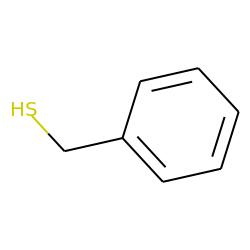

In [199]:
""" 
Annotating and drawing an example sulfur ligand 
"""
u1 = mda.Universe.from_smiles("C1=C(C=CC=C1)CS[H]")

AromaticSulfurSmilesString = 'C1=C(C=CC=C1)CS[H]'
m_aromatic = Chem.MolFromSmiles(AromaticSulfurSmilesString)
#mol_with_atom_index(m_aromatic)
m_aromatic


In [200]:
Allatoms = u1.select_atoms('all')
# Select Sulfer Anchor 
SulferAtom = u1.select_atoms('name S7')
LigandAtom = u1.select_atoms('name C4')
TransformationList = [] 
AlignmentVector = (SulferAtom.positions- LigandAtom.positions)[0]


for i in Allatoms.positions:
    vector = (i - SulferAtom.positions)[0]
    vector[0] = AlignmentVector[0] - vector[0]
    vector[1] = AlignmentVector[1] - vector[1]    
    vector[2] = AlignmentVector[2] - vector[2]
    if vector[0] == -math.inf:
        pass
    if vector[0] == 0.0:
        pass
    else:
        TransformationList.append(vector)
    
# Select ligand anchor
SulferAtom.positions
LigandAtom.positions
#Molecule.atoms.write("mol.pdb")


array([[-1.9754564 ,  0.81563294,  0.40278792]], dtype=float32)

In [173]:
A = LigandAtom.positions - SulferAtom.positions

In [174]:
Allatoms = u1.select_atoms('all')
B = Allatoms.positions

In [175]:
R, rmsd = align.rotation_matrix(A, B)

ValueError: 'a' and 'b' must have same shape

In [47]:
Allatoms.positions[0] - Allatoms.positions[0]

array([0., 0., 0.], dtype=float32)

In [105]:
for i in Allatoms:
    print(i.name)
    

C0
C1
C2
C3
C4
C5
C6
S7
H8
H9
H10
H11
H12
H13
H14
H15


In [106]:
R, rmsd = align.rotation_matrix(mobile0, ref0)

array([-5.153705  ,  0.5810416 ,  0.15714115], dtype=float32)

In [ ]:
np.cross()

In [231]:
# useful links
# https://math.stackexchange.com/questions/180418/calculate-rotation-matrix-to-align-vector-a-to-vector-b-in-3d
from scipy.linalg import solve

LigandList = [] 
Sphere = []
# Sulfur/ligand vector 
unitVector = np.linalg.norm(AlignmentVector)
print(unitVector)


vec1 = AlignmentVector.tolist()
for index in range(0, len(SphereList)):
    vec2 = SphereList[index] 
    transformationVector = rotation_matrix_from_vectors(vec1, vec2)  # Find the rotation matrix that aligns vec1 to vec2
    vec1_rot = transformationVector.dot(vec1)
    unitVectorabs = np.linalg.norm(AlignmentVector)  
    vecMultiplier = vec1_rot/unitVectorabs * 5
    #print(np.linalg.norm(vec1_rot))
    Sphere.append(vec1_rot.tolist())
    LigandList.append(vec1_rot.tolist())
    #print(vec1_rot, vec1_rot[0])
    # Get the factors to translate the vector 
    #LigandList.append(vec2)
    for trans in TransformationList:
        #if vec1_rot[0] > 0 and vec1_rot[1] > 0 and vec1_rot[2] > 0:   # (+ , +, +)
        Ans = transformationVector.dot(trans)
        Ans[0] = Ans[0] + vecMultiplier[0]
        Ans[1] = Ans[1] + vecMultiplier[1]
        Ans[2] = Ans[2] + vecMultiplier[2]
        LigandList.append(Ans.tolist())

4.9043484


In [232]:
LigandList  


[[-6.938893903907228e-16, 4.90434814846021, 0.0],
 [0.15025401960036064, 12.80828874176817, 1.372001252926006],
 [-1.0050212319252758, 12.339637158641043, 0.7608744166378608],
 [-1.868804067656559, 13.315958683354983, 0.27981988540999647],
 [-1.3652422033191312, 14.560383021496833, -0.0799658545878782],
 [-2.0952013959369675e-15, 14.808696067580192, 0.0],
 [0.7028527358148319, 13.975827348773105, 0.8610790199974468],
 [-1.3418851030220191, 10.907592517975836, 0.7156315773880422],
 [-1.4013120055462445e-15, 9.904347919119981, 0.0],
 [0.6450130553260883, 12.193535384174172, 2.107984531102337],
 [-2.905094024898649, 13.080735618375174, 0.09401460393188521],
 [-1.952730305580731, 15.256077633132342, -0.6515259613578696],
 [0.5286382863516121, 15.367827147637565, -0.7741458169707311],
 [1.6527145998402843, 14.333297167961668, 1.236439916066383],
 [-2.21796397089637, 10.779114259946333, 0.03520410179289424],
 [-1.577564659854225, 10.462065874425715, 1.692748355577248],
 [1.226184094596544, 1

In [221]:
Sphere

[[-6.938893903907228e-16, 4.90434814846021, 0.0],
 [-1.6150231165044728, 4.388100974938083, 1.4794934701473745],
 [0.26317000365192544, 3.8718538014159556, -2.998686454256888],
 [2.176182182661773, 3.3556066278938284, 2.838444297146863],
 [-3.9377051854949143, 2.8393594543717007, -0.6965246027970551],
 [3.6443763367896738, 2.3231122808495734, -2.318253913556162],
 [-1.183632490972657, 1.8068651073274458, 4.403053868798511],
 [-2.1807739824397268, 1.2906179338053185, -4.198947600025411],
 [4.548971246866129, 0.7743707602831912, 1.6612770034249964],
 [-4.5270292364694384, 0.25812358676106395, 1.8686918599420377],
 [2.0758072547668704, -0.25812358676106345, -4.435879531312806],
 [1.4493802060471292, -0.7743707602831911, 4.620852486851566],
 [-4.093732562914258, -1.2906179338053183, -2.372401697348208],
 [4.453027769515761, -1.8068651073274458, -0.9789856634032783],
 [-2.484118434615865, -2.323112280849573, 3.533402849191218],
 [-0.5138928400588803, -2.839359454371701, -3.965675579155631],

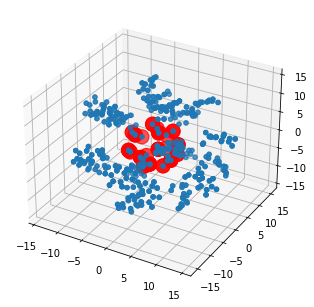

In [242]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d    
from mpl_toolkits.mplot3d import Axes3D
#x = plt.axes(projection='3d')

Xplot = []
Yplot = []
Zplot = []

XplotSphere = []
YplotSphere = [] 
ZplotSphere = [] 

for entry in LigandList:
    #ax.plot3D(entry[0], entry[1], entry[2], 'red')
    Xplot.append(entry[0])
    Yplot.append(entry[1])
    Zplot.append(entry[2])    
for entry in Sphere:
    #ax.plot3D(entry[0], entry[1], entry[2], 'red')
    XplotSphere.append(entry[0])
    YplotSphere.append(entry[1])
    ZplotSphere.append(entry[2])
    
#x.plot3D(Xplot, Yplot,Zplot, 'red')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Xplot, Yplot, Zplot, marker='o')
ax.scatter(XplotSphere, YplotSphere, ZplotSphere, marker = 'o', color = 'red', s = 200)
plt.show()

In [83]:
Xplot

[-1.867162704467773,
 -2.5926327705383296,
 -2.0345337390899654,
 -0.7820744514465329,
 -0.5038876533508297,
 -3.9678313732147212,
 -5.15370512008667,
 -2.298263311386108,
 -2.359453201293945,
 -0.5500531196594235,
 0.9645304679870609,
 0.19031667709350622,
 -4.243931293487549,
 -3.9651818275451656,
 -4.7070746421813965,
 -3.5758359053649906,
 -4.301305971435547,
 -3.743206939987183,
 -2.4907476523437504,
 -2.2125608542480473,
 -5.676504574111939,
 -6.862378320983887,
 -4.006936512283326,
 -4.0681264021911625,
 -2.258726320556641,
 -0.7441427329101564,
 -1.5183565238037111,
 -5.952604494384766,
 -5.673855028442383,
 -6.415747843078614,
 -1.5887323043547839,
 -2.3142023704253405,
 -1.7561033389769762,
 -0.5036440513335435,
 -0.22545725323784038,
 -3.689400973101732,
 -4.87527471997368,
 -2.019832911273119,
 -2.0810228011809557,
 -0.27162271954643413,
 1.2429608681000501,
 0.46874707720649555,
 -3.9655008933745592,
 -3.6867514274321764,
 -4.4286442420684065,
 0.43520940264620034,
 -0.290

In [83]:
Xplot

[7.165356632685138e-16,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 7.165356632685138e-16,
 -0.44239875605765777,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 7.165356632685138e-16,
 0.07379996601648667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 7.165356632685138e-16,
 0.6257909011426511,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 7.165356632685138e-16,
 -1.163369676355096,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 7.165356632685138e-16,
 1.1086169029087967,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 7.165356632685138e-16,
 -0.3716593347130335,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 7.165356632685138e-16,
 -0.7088793360016326,
 0.0,
 0.0,
 

In [30]:
u1 = mda.Universe.from_smiles("C1=C(C=CC=C1)CS[H]")
# Select Sulfer Anchor 
Allatoms = u1.select_atoms('all')
Allatoms

<AtomGroup with 16 atoms>

In [22]:
import csv

In [208]:
LigandList

[[0.15025401960036133, 7.808288971108397, 1.372001252926006],
 [-1.0050212319252751, 7.339637387981271, 0.7608744166378608],
 [-1.8688040676565583, 8.315958912695212, 0.27981988540999647],
 [-1.3652422033191305, 9.560383250837061, -0.0799658545878782],
 [-1.3877787807814457e-15, 9.80869629692042, 0.0],
 [0.7028527358148325, 8.975827578113334, 0.8610790199974468],
 [-1.3418851030220185, 5.907592747316064, 0.7156315773880422],
 [-6.938893903907228e-16, 4.90434814846021, 0.0],
 [0.645013055326089, 7.1935356135144, 2.107984531102337],
 [-2.905094024898648, 8.080735847715403, 0.09401460393188521],
 [-1.9527303055807304, 10.256077862472571, -0.6515259613578696],
 [0.5286382863516128, 10.367827376977793, -0.7741458169707311],
 [1.652714599840285, 9.333297397301896, 1.236439916066383],
 [-2.217963970896369, 5.779114489286562, 0.03520410179289424],
 [-1.5775646598542243, 5.4620661037659435, 1.692748355577248],
 [1.2261840945965448, 5.338089264929145, 0.5405956616084533],
 [-2.970866693167163, 6

In [23]:
with open("new_file.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(LigandList)

In [132]:
transformedVector.T.tolist()

[-2.5608210805367886, -4.496216419466759, -0.3494961560597453]

In [234]:
#vector_plot(Sphere)
vector_plot(LigandList)

In [140]:
TranslationVect = AlignmentVector / vec1_rot

In [49]:
TranslationVect

array([0.00324647, 0.00324647, 0.00324647])

In [50]:
Molecule.positions
for i in range(0, len(Molecule.positions)-1):
    Molecule.positions[i] = Molecule.positions[i] * TranslationVect

In [51]:
Molecule.positions

array([[ 0.1490759 , -1.1459075 , -0.31185314],
       [ 1.4944595 , -1.1731539 , -0.14689505],
       [ 2.1492674 , -0.03032867,  0.1573485 ],
       [ 1.5280523 ,  1.117614  , -0.20492782],
       [ 0.18026757,  1.1814245 , -0.2126722 ],
       [-0.54661715,  0.016509  , -0.00592052],
       [-2.0061927 ,  0.03487462,  0.15122962],
       [-2.7410429 ,  0.02135311, -0.88206416],
       [-2.56019   , -0.07709748,  1.4281058 ],
       [-0.39320594, -2.066033  , -0.4745795 ],
       [ 3.0566087 , -0.01419827,  0.7614358 ],
       [-0.3104826 ,  2.1349435 , -0.25920734]], dtype=float32)

In [26]:
from scipy.spatial.transform import Rotation as R

In [27]:
r = R.from_quat([0, 0, np.sin(np.pi/4), np.cos(np.pi/4)])

In [28]:
r

In [ ]:
"""


"""